In [1]:
import numpy as np
import pandas as pd

train_data = 'datasets/train/train_feature.npz'
tdata_feature= np.load(train_data)

valid_data = 'datasets/valid/valid_feature.npz'
vdata_feature = np.load(valid_data)

# Various Experiment models

**Using Logistic Regression**

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature=[]
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature=[]
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

pca = PCA(n_components=100)

X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature,columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature,columns=feature_columns)

percentages = [20,40,60,80,100]

for p in percentages:
    num = int(len(X_feature)*(p/100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    logreg = LogisticRegression()
    logreg.fit(X_subset_feature,Y_subset_feature)
    log_pred = logreg.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature,log_pred)
    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")


Validation accuracy in 20% of data is 96.93%
Validation accuracy in 40% of data is 96.93%
Validation accuracy in 60% of data is 97.55%
Validation accuracy in 80% of data is 98.16%
Validation accuracy in 100% of data is 98.36%


**Using Naive Bayes classifier**

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature=[]
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature=[]
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

# Perform PCA
pca = PCA(n_components=100)
X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

# Create dataframe for features
feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature, columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature, columns=feature_columns)


percentages = [20, 40, 60, 80, 100]

for p in percentages:
    num = int(len(X_feature) * (p / 100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    # Using Naive Bayes classifier instead of Logistic Regression
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_subset_feature, Y_subset_feature)

    # Predict and calculate accuracy
    nb_pred = nb_classifier.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature, nb_pred)

    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")


Validation accuracy in 20% of data is 88.75%
Validation accuracy in 40% of data is 88.96%
Validation accuracy in 60% of data is 89.37%
Validation accuracy in 80% of data is 88.96%
Validation accuracy in 100% of data is 90.18%


**Using SVM with polynomial kernel**

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature = []
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature = []
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

# Perform PCA
pca = PCA(n_components=100)
X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

# Create dataframe for features
feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature, columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature, columns=feature_columns)


percentages = [20, 40, 60, 80, 100]

for p in percentages:
    num = int(len(X_feature) * (p / 100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    # Using hard-margin SVM (C is very large, simulating hard margin)
    svm_classifier = svm.SVC(kernel='poly', C=1e10)  # Very large C for hard margin
    svm_classifier.fit(X_subset_feature, Y_subset_feature)

    # Predict and calculate accuracy
    svm_pred = svm_classifier.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature, svm_pred)

    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")


Validation accuracy in 20% of data is 94.68%
Validation accuracy in 40% of data is 96.32%
Validation accuracy in 60% of data is 96.52%
Validation accuracy in 80% of data is 96.73%
Validation accuracy in 100% of data is 97.75%


**Using LwP with Euclidean Distance**

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming tdata_feature and vdata_feature are preloaded datasets
Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature = []
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature = []
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

# Perform PCA
pca = PCA(n_components=100)
X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

# Create dataframe for features
feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature, columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature, columns=feature_columns)


percentages = [20, 40, 60, 80, 100]

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function for LwP
def lwp_classifier(X_train, Y_train, X_test):
    # Calculate prototypes (mean of features for each class)
    unique_classes = np.unique(Y_train)
    prototypes = {}

    for cls in unique_classes:
        class_features = X_train[Y_train == cls]
        prototypes[cls] = np.mean(class_features, axis=0)

    predictions = []

    # For each test sample, find the nearest prototype using Euclidean distance
    for test_sample in X_test:
        closest_class = None
        closest_distance = float('inf')

        for cls, prototype in prototypes.items():
            dist = euclidean_distance(test_sample, prototype)
            if dist < closest_distance:
                closest_distance = dist
                closest_class = cls

        predictions.append(closest_class)

    return np.array(predictions)
for p in percentages:
    num = int(len(X_feature) * (p / 100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    # Apply LwP with Euclidean distance
    lwp_pred = lwp_classifier(X_subset_feature.values, Y_subset_feature, X_val_feature.values)
    val_acc = accuracy_score(Y_val_feature, lwp_pred)
    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")

Validation accuracy in 20% of data is 94.68%
Validation accuracy in 40% of data is 94.68%
Validation accuracy in 60% of data is 93.25%
Validation accuracy in 80% of data is 92.84%
Validation accuracy in 100% of data is 93.66%


**Decision Tree Classifier**

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming tdata_feature and vdata_feature are preloaded datasets
Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature = []
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature = []
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

# Perform PCA
pca = PCA(n_components=100)
X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

# Create dataframe for features
feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature, columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature, columns=feature_columns)


percentages = [20, 40, 60, 80, 100]

# Loop over different percentages of data
for p in percentages:
    num = int(len(X_feature) * (p / 100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    # Using Decision Tree Classifier
    tree_classifier = DecisionTreeClassifier()
    tree_classifier.fit(X_subset_feature, Y_subset_feature)

    # Predict and calculate accuracy
    tree_pred = tree_classifier.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature, tree_pred)

    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")


Validation accuracy in 20% of data is 89.57%
Validation accuracy in 40% of data is 90.59%
Validation accuracy in 60% of data is 93.87%
Validation accuracy in 80% of data is 91.21%
Validation accuracy in 100% of data is 92.23%


**Using Multi Layer Perceptron classifier(hidden_layer_sizes=(100,100))**

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Assuming tdata_feature and vdata_feature are preloaded datasets
Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature = []
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature = []
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

# Perform PCA
pca = PCA(n_components=100)
X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

# Create dataframe for features
feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature, columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature, columns=feature_columns)


percentages = [20, 40, 60, 80, 100]

# Loop over different percentages of data
for p in percentages:
    num = int(len(X_feature) * (p / 100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]

    mlpc = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500)
    mlpc.fit(X_subset_feature,Y_subset_feature)
    mlpc_pred = mlpc.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature,mlpc_pred)

    print(f"Validation accuracy in {p}% of data is {100*val_acc:.2f}%")


Validation accuracy in 20% of data is 96.32%
Validation accuracy in 40% of data is 97.34%
Validation accuracy in 60% of data is 98.16%
Validation accuracy in 80% of data is 97.96%
Validation accuracy in 100% of data is 98.36%


<hr>

# Conclusion

**We have found 3 best models those are - Logistic Regression, RBF kernel SVM and Multi Layer Perceptron Classifier.**

1. Logistic regression will have 100 trainable parameters as we have 100 features after performing PCA

2. We have found that total number of trainable parameters exceeds the 10k requirement, in the case of RBF kernel SVM, as a result this model can't be our main model

3. MLP Classifier has 2 hidden layers each of 100 nodes, so the total number of trainable parameters are 200.

**Among these models, RBF kernel SVM has performed consistently well on multiple runs, followed by Logistic Regression. However it fails the requirement of within 10k trainable parameters. In some cases, accuracy of MLPC falls on increasing training data which is not seen in our other models,also the accuracy of MLPC varies greatly on every run. Due to such erratic behaviour of MLPC and consistent performance of Logistic Regression on multiple runs, we decided to choose Logistic Regression as our primary model**

## Final code with plots

-----LOGISTIC REGRESSION-----
Validation accuracy in 20% of data is 0.9631901840490797
Validation accuracy in 40% of data is 0.9734151329243353
Validation accuracy in 60% of data is 0.9795501022494888
Validation accuracy in 80% of data is 0.983640081799591
Validation accuracy in 100% of data is 0.9856850715746421
-----RBF kernel SVM-----
Validation accuracy in 20% of data is 0.9652351738241309
Validation accuracy in 40% of data is 0.9693251533742331
Validation accuracy in 60% of data is 0.9754601226993865
Validation accuracy in 80% of data is 0.9856850715746421
Validation accuracy in 100% of data is 0.9897750511247444
-----MLPC-----
Validation accuracy in 20% of data is 0.9631901840490797
Validation accuracy in 40% of data is 0.9775051124744376
Validation accuracy in 60% of data is 0.9754601226993865
Validation accuracy in 80% of data is 0.9918200408997955
Validation accuracy in 100% of data is 0.9856850715746421


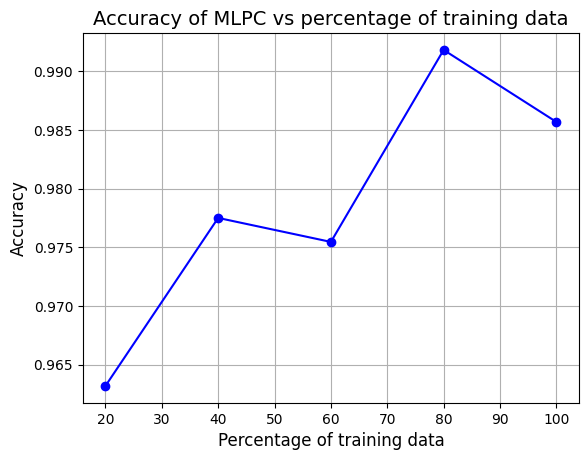

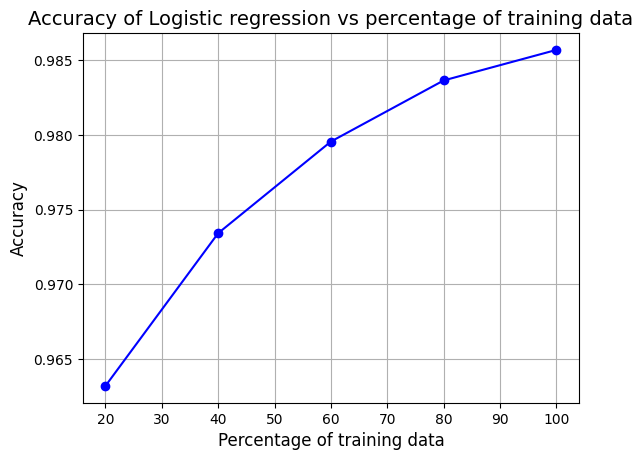

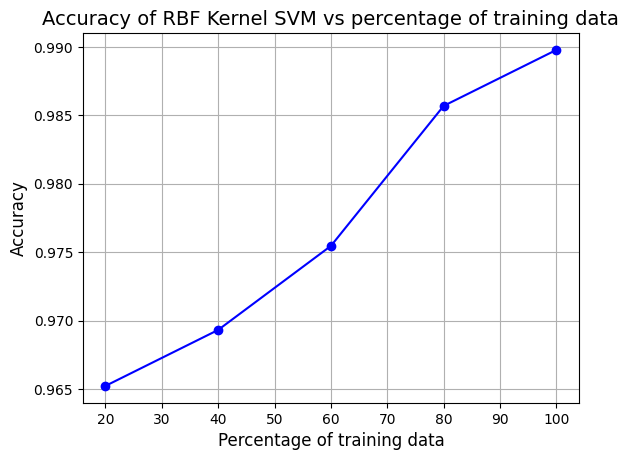

Plots are saved in Dataset2_mlpc.png, Dataset2_logreg.png and Dataset2_svm.png respectively


In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

train_feature = "datasets/train/train_feature.npz"
valid_feature = "datasets/valid/valid_feature.npz"

tdata_feature = np.load(train_feature)
vdata_feature = np.load(valid_feature)

Xd_feature = tdata_feature['features']
Y_feature = tdata_feature['label']
X_feature=[]
for mat in Xd_feature:
    X_feature.append(mat.flatten())

Vd_feature = vdata_feature['features']
Y_val_feature = vdata_feature['label']

X_val_feature=[]
for mat in Vd_feature:
    X_val_feature.append(mat.flatten())

pca = PCA(n_components=100)

X_feature = pca.fit_transform(X_feature)
X_val_feature = pca.transform(X_val_feature)

feature_columns = [f'feature_{i}' for i in range(1, 101)]
X_feature = pd.DataFrame(X_feature,columns=feature_columns)
X_val_feature = pd.DataFrame(X_val_feature,columns=feature_columns)

mlp_acc=[]
log_acc=[]
svm_acc=[]
percentages = [20,40,60,80,100]
print("-----LOGISTIC REGRESSION-----")
for p in percentages:
    num = int(len(X_feature)*(p/100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]
    
    logreg = LogisticRegression()
    logreg.fit(X_subset_feature,Y_subset_feature)
    log_pred = logreg.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature,log_pred)
    log_acc.append(val_acc)
    print(f"Validation accuracy in {p}% of data is {val_acc}")

print("-----RBF kernel SVM-----")
for p in percentages:
    num = int(len(X_feature)*(p/100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]
    
    svc = svm.SVC()
    svc.fit(X_subset_feature,Y_subset_feature)
    svc_pred = svc.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature,svc_pred)
    svm_acc.append(val_acc)
    print(f"Number of support vectors learnt using {p}% of data is {len(svc.support_)}")
    print(f"Validation accuracy in {p}% of data is {val_acc}\n")

print("-----MLPC-----")
for p in percentages:
    num = int(len(X_feature)*(p/100))
    X_subset_feature = X_feature[:num]
    Y_subset_feature = Y_feature[:num]
    
    mlpc = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500)
    mlpc.fit(X_subset_feature,Y_subset_feature)
    mlpc_pred = mlpc.predict(X_val_feature)
    val_acc = accuracy_score(Y_val_feature,mlpc_pred)
    mlp_acc.append(val_acc)
    print(f"Validation accuracy in {p}% of data is {val_acc}")

plt.plot(percentages,mlp_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of MLPC vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset2_mlpc.png', bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(percentages,log_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Logistic regression vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset2_logreg.png', bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(percentages,svm_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of RBF Kernel SVM vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset2_svm.png', bbox_inches='tight')
plt.show()

print("Plots are saved in Dataset2_mlpc.png, Dataset2_logreg.png and Dataset2_svm.png respectively")